In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, roc_auc_score, accuracy_score
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.duplicated().sum()

723

In [ ]:
# data.loc[data.duplicated(keep='first'),:]

In [ ]:
# data.drop_duplicates(keep='first',inplace=True)
# data

In [ ]:
data.shape

(1025, 14)

In [ ]:
data.columns=['age','sex','chest pain type','resting blood pressure','cholestoral','fasting blood sugar',
              'resting electrocardiographic','maximum heart rate','exercise induced angina','ST depression',
              'slope','number of major vessels','thal','target'
             ]

In [ ]:
data.head()

,age,sex,chest pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,ST depression,slope,number of major vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1025 non-null   int64  
 1   sex                           1025 non-null   int64  
 2   chest pain type               1025 non-null   int64  
 3   resting blood pressure        1025 non-null   int64  
 4   cholestoral                   1025 non-null   int64  
 5   fasting blood sugar           1025 non-null   int64  
 6   resting electrocardiographic  1025 non-null   int64  
 7   maximum heart rate            1025 non-null   int64  
 8   exercise induced angina       1025 non-null   int64  
 9   ST depression                 1025 non-null   float64
 10  slope                         1025 non-null   int64  
 11  number of major vessels       1025 non-null   int64  
 12  thal                          1025 non-null   int64  
 13  tar

In [ ]:
data.describe()

,age,sex,chest pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,ST depression,slope,number of major vessels,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
corr=data.corr()
corr

,age,sex,chest pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,ST depression,slope,number of major vessels,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
chest pain type,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
resting blood pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
cholestoral,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fasting blood sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
resting electrocardiographic,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
maximum heart rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exercise induced angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
ST depression,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

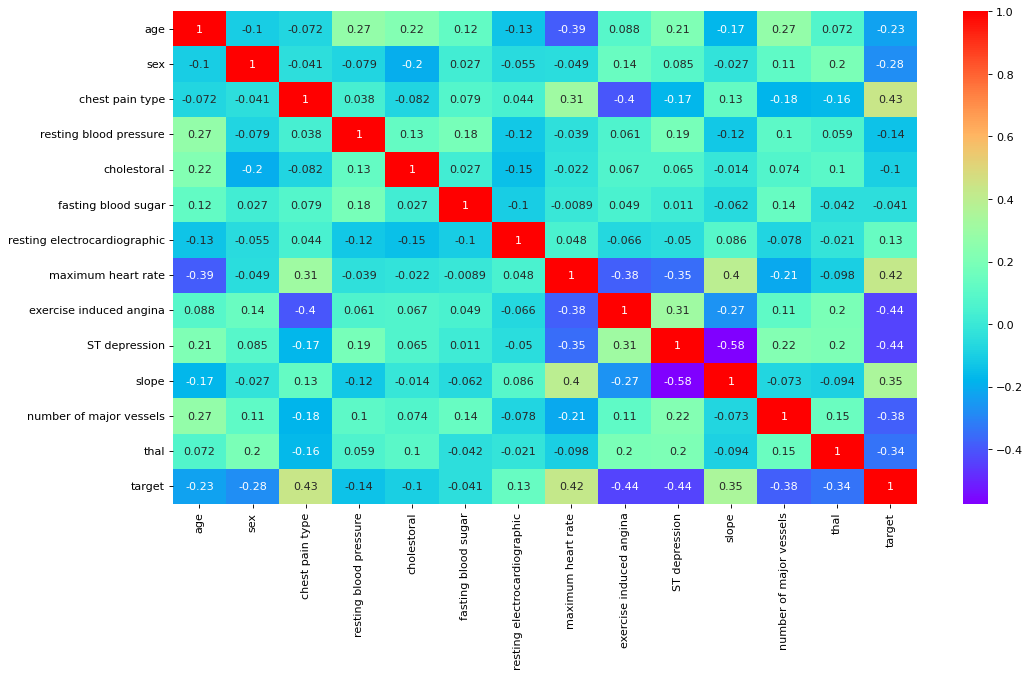

In [ ]:
plt.figure(figsize=(15,8),dpi=80)
sns.heatmap(data=corr,annot=True,cmap='rainbow')

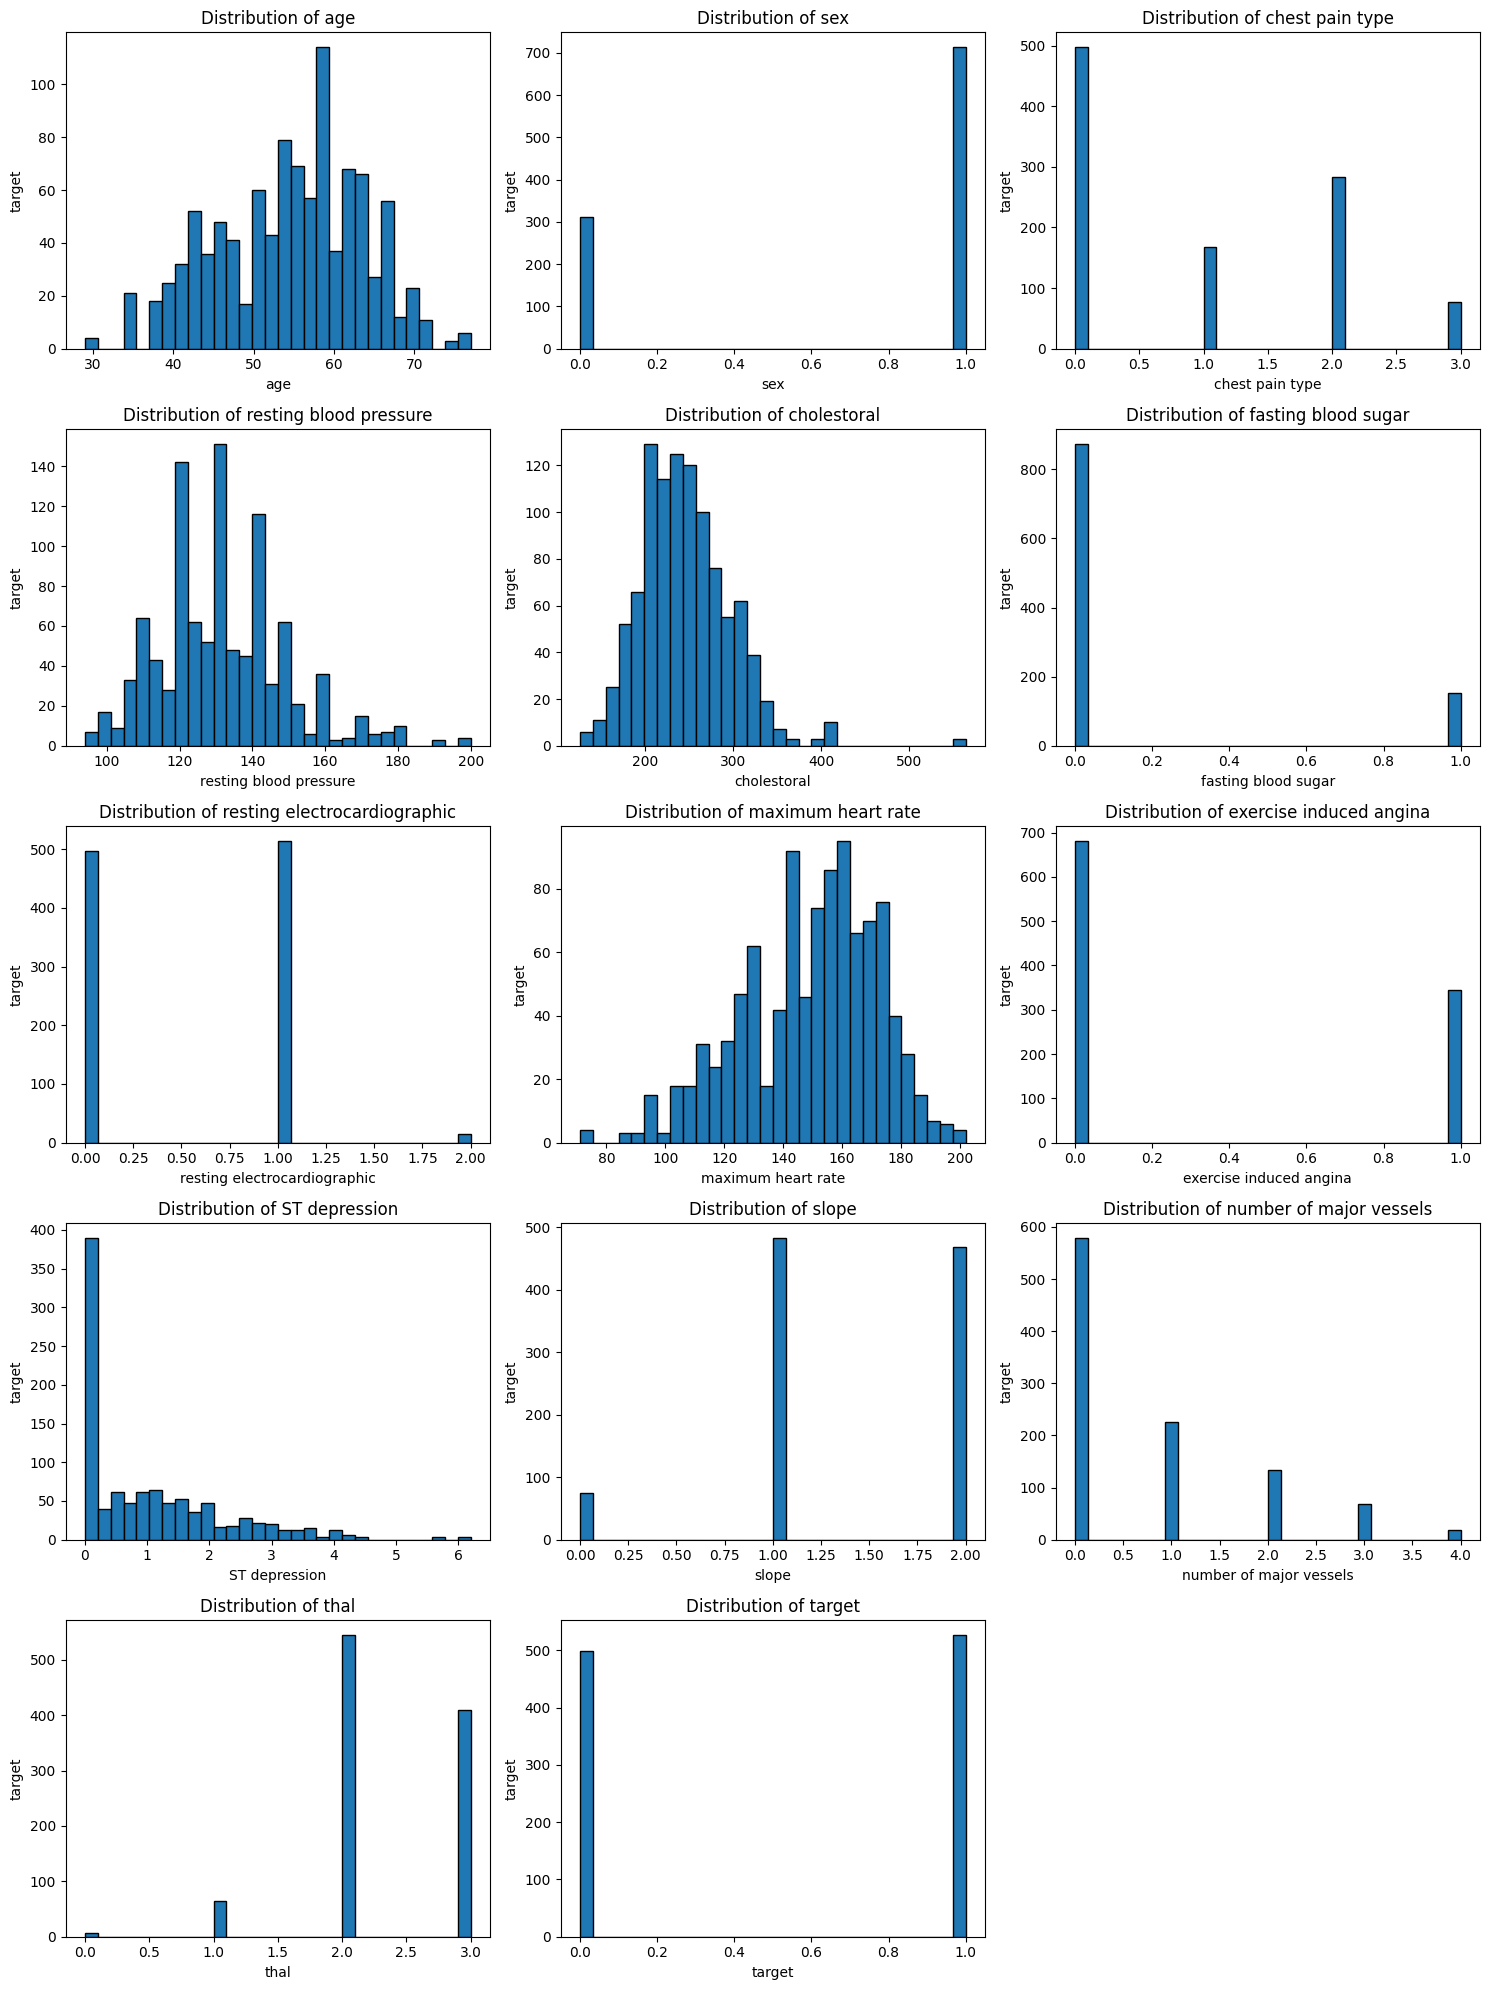

In [ ]:
num_columns = len(data.columns)

# Set the figure size
figsize = (15, 20)

# Calculate the number of rows needed to accommodate all columns
num_rows = (num_columns + 2) // 3  # Round up to ensure enough rows
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

# Plot the distribution of each column
for i, column in enumerate(data.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    data[column].plot(kind='hist', ax=ax, bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('target')

# Remove any empty subplots
if num_columns < num_rows * num_cols:
    for j in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
X=data.drop('target',axis=1)
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Confusion Matrix:
 [[243  11]
 [ 12 247]]
Accuracy:
 0.9551656920077972
Precision:
 0.9573643410852714
Recall:
 0.9536679536679536
F1 score:
 0.9555125725338491


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Confusion Matrix:
 [[243  11]
 [  6 253]]
Accuracy:
 0.9668615984405458
Precision:
 0.9583333333333334
Recall:
 0.9768339768339769
F1 score:
 0.9674952198852772


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=2200)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Confusion Matrix:
 [[194  60]
 [ 33 226]]
Accuracy:
 0.8187134502923976
Precision:
 0.7902097902097902
Recall:
 0.8725868725868726
F1 score:
 0.8293577981651375


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_test,y_test)
y_pred=model.predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Confusion Matrix:
 [[220  34]
 [ 55 204]]
Accuracy:
 0.8265107212475633
Precision:
 0.8571428571428571
Recall:
 0.7876447876447876
F1 score:
 0.8209255533199196


In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Confusion Matrix:
 [[195  59]
 [ 38 221]]
Accuracy:
 0.8109161793372319
Precision:
 0.7892857142857143
Recall:
 0.8532818532818532
F1 score:
 0.8200371057513914


In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Confusion Matrix:
 [[187  67]
 [ 33 226]]
Accuracy:
 0.8050682261208577
Precision:
 0.7713310580204779
Recall:
 0.8725868725868726
F1 score:
 0.818840579710145


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print("Accuracy:\n",metrics.accuracy_score(y_test,y_pred))
print("Precision:\n",metrics.precision_score(y_test,y_pred))
print("Recall:\n",metrics.recall_score(y_test,y_pred))
print("F1 score:\n",metrics.f1_score(y_test,y_pred))

Accuracy:
 0.9707602339181286
Precision:
 0.9552238805970149
Recall:
 0.9884169884169884
F1 score:
 0.9715370018975333


In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:


    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'ML Name'] = MLA_name
    MLA_compare.loc[row_index, 'ML Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'ML Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'ML Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'ML Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'ML F1 Score'] = f1_score(y_test, predicted)
    row_index+=1

MLA_compare.sort_values(by = ['ML Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,ML Name,ML Train Accuracy,ML Test Accuracy,ML Precission,ML Recall,ML F1 Score
1,RandomForestClassifier,1.0000,0.9854,1.000000,0.970874,0.985222
6,DecisionTreeClassifier,1.0000,0.9854,1.000000,0.970874,0.985222
0,GradientBoostingClassifier,0.9829,0.9317,0.915888,0.951456,0.933333
3,GaussianNB,0.8390,0.8000,0.754098,0.893204,0.817778
2,LogisticRegressionCV,0.8695,0.7854,0.743802,0.873786,0.803571
5,LinearSVC,0.8390,0.7805,0.716418,0.932039,0.810127
4,KNeighborsClassifier,0.9232,0.7317,0.730769,0.737864,0.734300


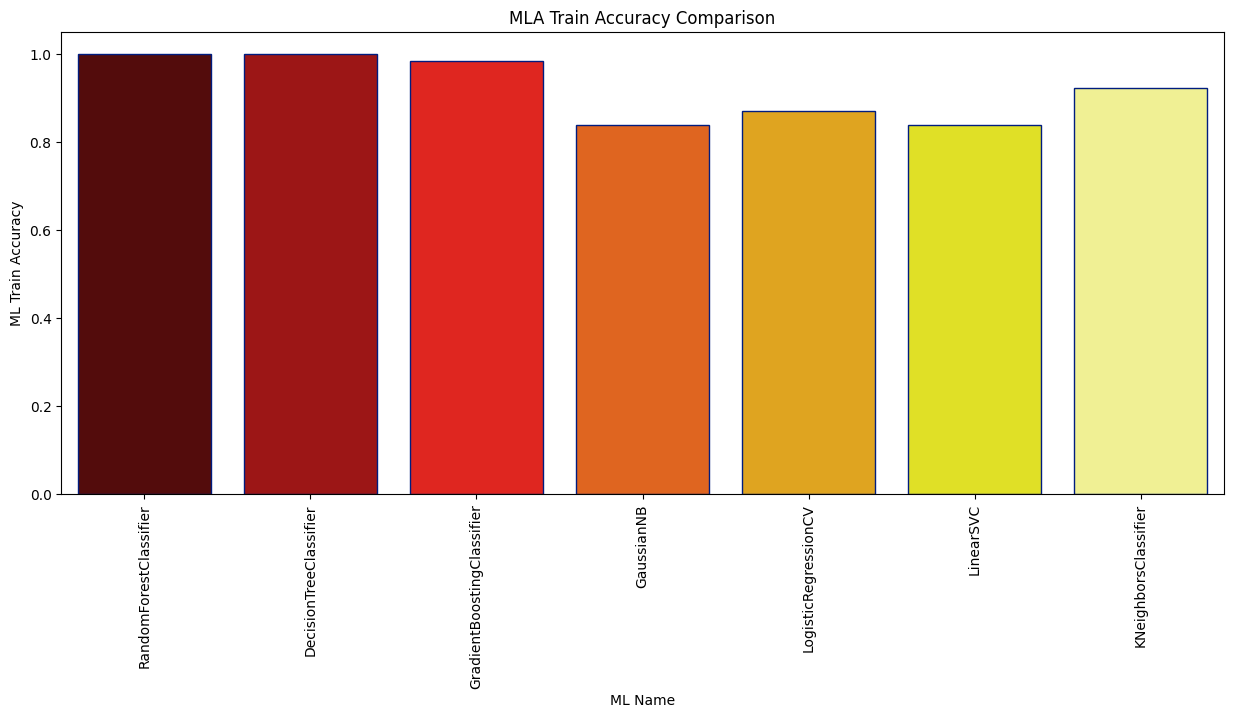

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="ML Name", y="ML Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

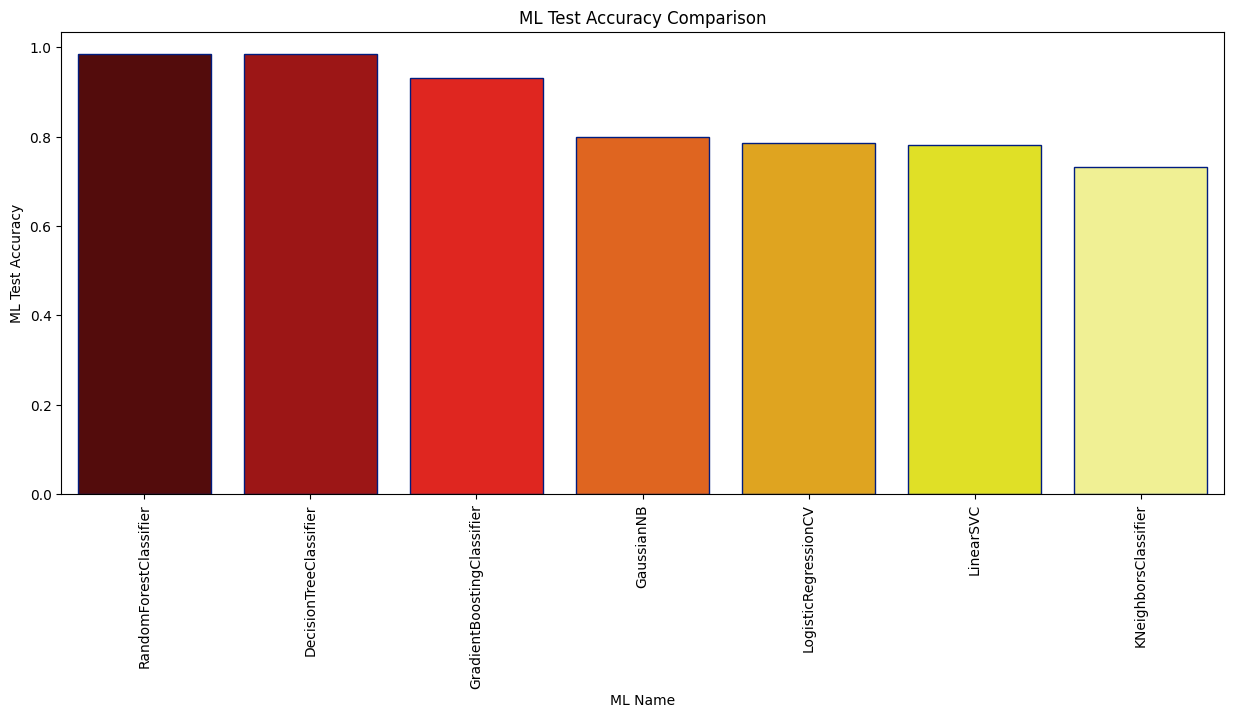

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="ML Name", y="ML Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Test Accuracy Comparison')
plt.show()

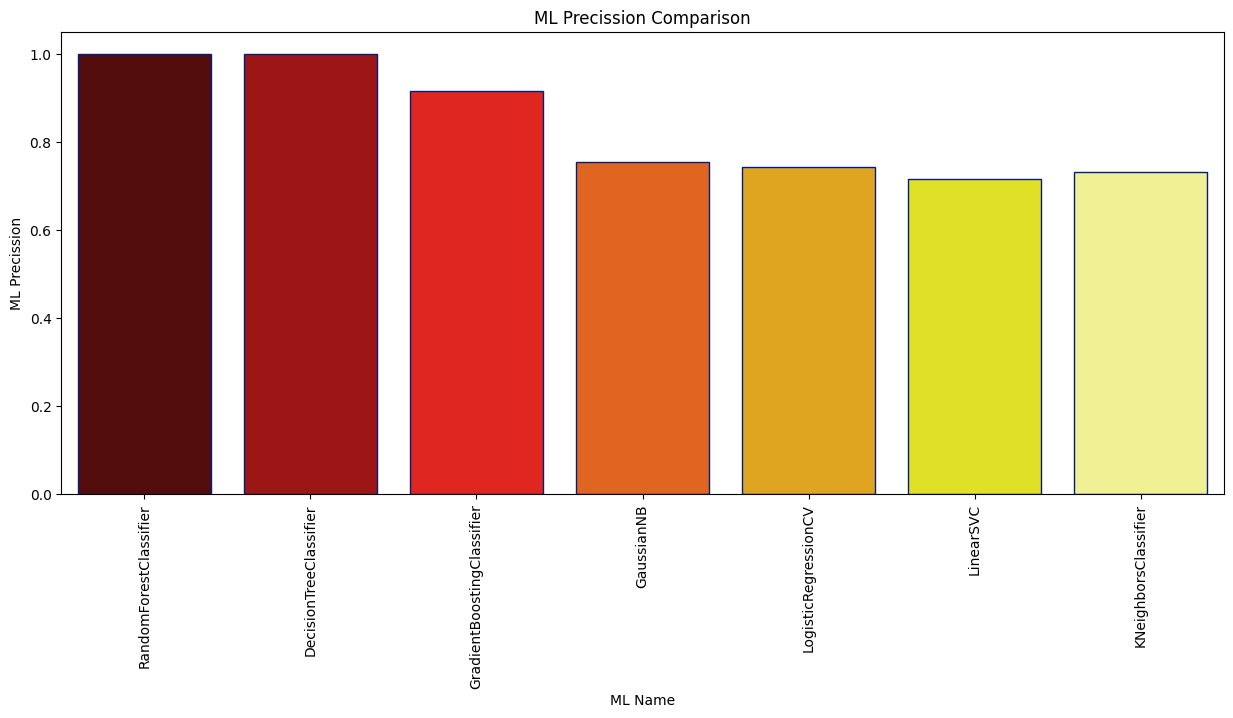

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="ML Name", y="ML Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Precission Comparison')
plt.show()

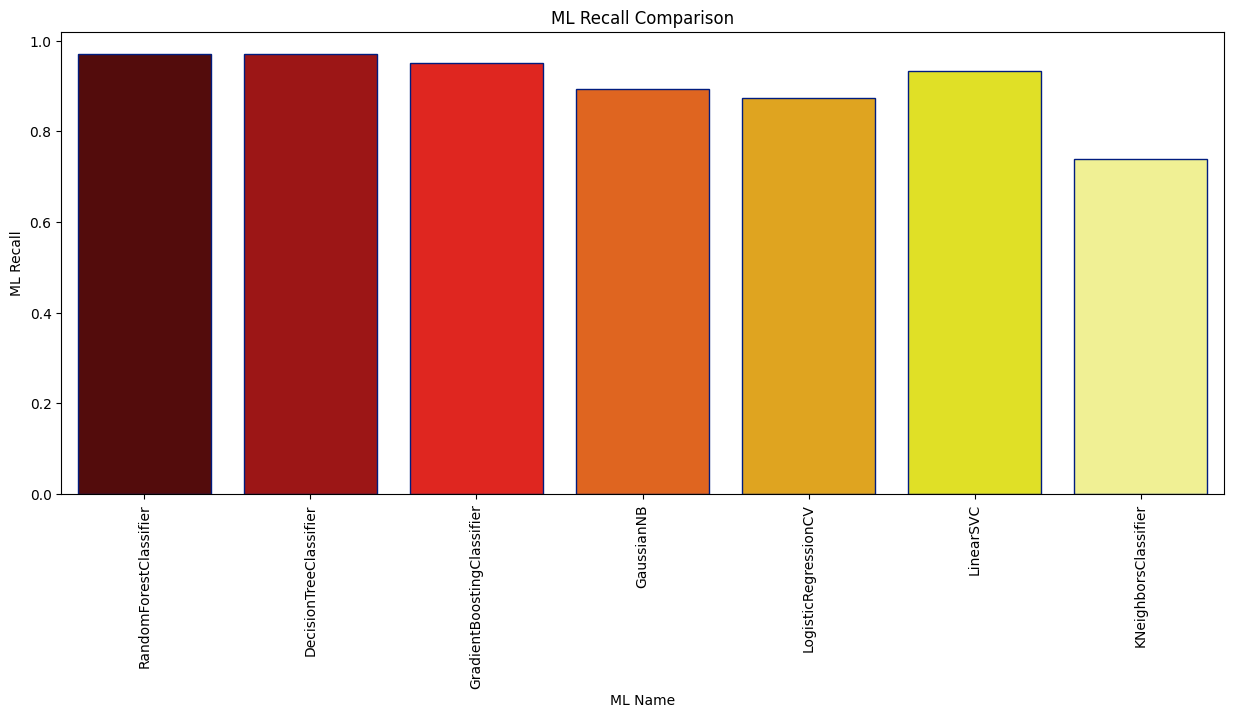

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="ML Name", y= "ML Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Recall Comparison')
plt.show()

array([[1, 2, 3, 4, 5],
       [5, 6, 7, 8, 9],
       [9, 8, 7, 6, 5]])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

,col1,col2,col3,col4
Row1,0,1,2,3
Row2,4,5,6,7
Row3,8,9,10,11
Row4,12,13,14,15
Row5,16,17,18,19


ValueError: No axis named Row1 for object type DataFrame